In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

Create a dummy dataset using `make_blobs`:

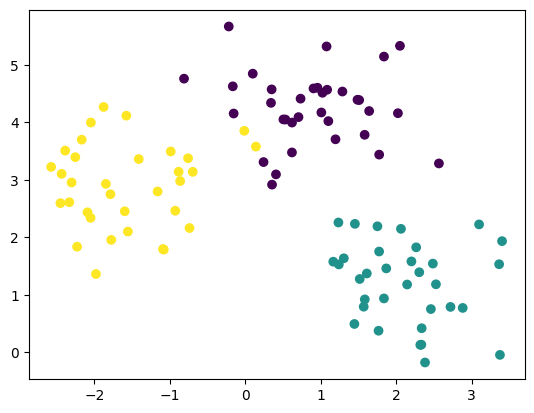

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0, cluster_std=0.7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, marker="o");

In [16]:
from toygrad.nn import MLP
from toygrad.utils import softmax, cross_entropy

epochs = 100
learning_rate = 1e-3
model = MLP(2, [10, 3])

for i in range(epochs):
    model.zero_grad()
    
    y_scores = [model(x) for x in X_train]
    y_scores = softmax(y_scores)

    # Categorical cross entropy can be simplified
    # by negating the log of the score of the true label.
    loss = cross_entropy(y_scores, y_train)
    loss.backward()

    for p in model.parameters():
        p.data += learning_rate * p.grad
    
    print(f'Epoch: {i}, loss: {loss}')

Epoch: 0, loss: Value=115.57557392529887,Grad:1.0
Epoch: 1, loss: Value=107.5552543609076,Grad:1.0
Epoch: 2, loss: Value=100.46991545192401,Grad:1.0
Epoch: 3, loss: Value=94.38509401899019,Grad:1.0
Epoch: 4, loss: Value=89.2607530627624,Grad:1.0
Epoch: 5, loss: Value=84.99575120844806,Grad:1.0
Epoch: 6, loss: Value=81.58166100875502,Grad:1.0
Epoch: 7, loss: Value=79.28278870604969,Grad:1.0
Epoch: 8, loss: Value=78.55363648659036,Grad:1.0
Epoch: 9, loss: Value=79.24967334645561,Grad:1.0
Epoch: 10, loss: Value=80.00580531988892,Grad:1.0
Epoch: 11, loss: Value=80.01137501667623,Grad:1.0
Epoch: 12, loss: Value=79.5164430521137,Grad:1.0
Epoch: 13, loss: Value=78.80705829390324,Grad:1.0
Epoch: 14, loss: Value=78.05215168905819,Grad:1.0
Epoch: 15, loss: Value=77.37173978640304,Grad:1.0
Epoch: 16, loss: Value=76.85270104621917,Grad:1.0
Epoch: 17, loss: Value=76.52655774705471,Grad:1.0
Epoch: 18, loss: Value=76.36032399973604,Grad:1.0
Epoch: 19, loss: Value=76.28688525281227,Grad:1.0
Epoch: 20,

In [17]:
from toygrad.utils import argmax
from sklearn.metrics import accuracy_score
    

def evaluate(model, X, y):
    y_scores = [model(x) for x in X]
    y_scores = softmax(y_scores)
    
    y_pred = [argmax(scores) for scores in y_scores]
    accuracy = accuracy_score(y, y_pred)
    return accuracy

test_acc = evaluate(model, X_test, y_test)
test_acc

0.8